In [1]:
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np
import seaborn as sns
import sys

import random
import math
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import signatureanalyzer as sa

## Input mutations file labeled by clone

In [6]:
sigs_maf = pd.read_csv('for_paper_all_pats_mut_ccfs_by_clone_080323.maf',sep='\t',index_col=0)
sigs_maf


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Patient_ID,Sample_ID,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,Protein_change,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,1002,cfDNA_10351,LOXL4,10,100016625,C,T,431,0,p.G447E,...,17,NaN,NaN,0.02,0.0,0.04,0.01,0.01,0.01,MGH1002_17
1,1002,cfDNA_10351,LOXL4,10,100017460,C,G,172,0,p.E403Q,...,22,NaN,NaN,0.04,0.0,0.09,0.01,0.01,0.01,MGH1002_22
2,1002,cfDNA_10351,LOXL4,10,100017542,C,T,168,0,p.L375L,...,22,NaN,NaN,0.04,0.0,0.10,0.01,0.01,0.01,MGH1002_22
3,1002,cfDNA_10351,LOXL4,10,100017731,C,T,196,0,NaN,...,22,NaN,NaN,0.03,0.0,0.08,0.01,0.01,0.01,MGH1002_22
4,1002,cfDNA_10351,ABCC2,10,101556917,G,A,635,0,p.E232E,...,22,NaN,NaN,0.01,0.0,0.03,0.01,0.01,0.01,MGH1002_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55183,2542,2542_18,ZNF169,9,97063030,C,T,382,0,p.S397L,...,17,NaN,NaN,0.03,0.0,0.07,0.01,0.01,0.01,2542_hapaseg_kristy_tool_v5_17
55184,2542,2542_18,ERCC6L2,9,98766896,C,G,194,0,p.S1207*,...,17,NaN,NaN,0.06,0.0,0.14,0.01,0.01,0.01,2542_hapaseg_kristy_tool_v5_17
55185,2542,2542_18,ERCC6L2,9,98774805,C,T,126,0,p.Q1336*,...,19,NaN,NaN,0.09,0.0,0.20,0.01,0.01,0.01,2542_hapaseg_kristy_tool_v5_19
55186,2542,2542_18,HSD17B3,9,99013721,C,T,256,0,p.L144L,...,16,NaN,NaN,0.04,0.0,0.11,0.01,0.01,0.01,2542_hapaseg_kristy_tool_v5_16


In [3]:
sigs_maf.drop(columns=['Sample_ID'],inplace=True)
sigs_maf.rename(columns={'Tumor_Seq_Allele':'Tumor_Seq_Allele2'},inplace=True)

In [6]:
sigs_maf.drop_duplicates(subset=['Tumor_Sample_Barcode','Hugo_Symbol','Start_position'],keep='first',inplace=True)

In [50]:
sample_mutations_present_with_spectra, spectra_df = sa.spectra.get_spectra_from_maf(sigs_maf, hgfile='/home/jupyter/hg19.2bit', reference='cosmic3')

spectra_df


      * Mapping contexts: 19465 / 19466


sample,2389_multiple_6_1,2389_multiple_6_10,2389_multiple_6_11,2389_multiple_6_12,2389_multiple_6_13,2389_multiple_6_14,2389_multiple_6_15,2389_multiple_6_16,2389_multiple_6_17,2389_multiple_6_18,...,MGH2819_9,MGH2974_1,MGH2974_2,MGH2974_3,MGH2974_4,MGH2974_5,MGH2974_6,MGH2974_7,MGH2974_8,MGH2974_9
context96.word,,,,,,,,,,,,,,,,,,,,,
ACAA,0,0,0,0,0,0,0,0,3,2,...,2,0,0,0,0,0,0,0,1,0
ACAC,0,0,1,1,1,4,0,8,3,1,...,1,0,0,0,0,0,0,0,1,0
ACAG,0,2,0,4,3,7,2,7,7,38,...,28,0,0,0,0,0,0,0,1,0
ACAT,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
ACCA,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGT,0,0,0,0,0,2,1,1,0,5,...,0,2,0,0,0,0,0,0,1,2
CTTA,1,6,23,23,56,12,101,20,47,229,...,0,4,6,2,4,4,0,0,16,8
CTTC,2,2,7,6,20,6,33,6,14,81,...,0,1,2,1,1,0,1,0,8,1


## match new sigs with older sigs

In [96]:
older_sigs_for_comut = pd.read_csv("ONLY_AUT_all_cdk4_clones_sigs_for_comut_updated_0503_more_spaces.tsv", sep='\t')
older_sigs_for_comut


,sample,Signature 6,Signature 17,Artifact,Signature 5,Signature 2
0,MGH1002_1,4.612202e-01,0.000000,1.108126e-02,2.444315e-01,2.832670e-01
1,MGH1002_19,4.396846e-02,0.181892,0.000000e+00,3.330000e-45,7.741397e-01
2,MGH1002_20,4.030000e-46,0.046687,0.000000e+00,1.075963e-02,9.425534e-01
3,MGH1002_15,3.981938e-01,0.017862,4.739877e-03,3.457552e-01,2.334489e-01
4,MGH1002_11,4.392480e-01,0.000000,2.140755e-01,2.451009e-01,1.015757e-01
...,...,...,...,...,...,...
119,MGH1113_3,2.852500e-01,0.000000,7.882720e-02,2.420480e-01,3.938748e-01
120,MGH1113_5,9.766217e-01,0.000000,2.337831e-02,0.000000e+00,0.000000e+00
121,MGH1113_12,9.212067e-01,0.000000,2.590000e-44,7.879331e-02,3.620000e-45
122,Space_MGH1113_1,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [98]:
older_sigs_samples = older_sigs_for_comut['sample'].to_list()
older_sigs_samples

['MGH1002_1',
 'MGH1002_19',
 'MGH1002_20',
 'MGH1002_15',
 'MGH1002_11',
 'MGH1002_13',
 'MGH1002_21',
 'MGH1002_10',
 'MGH1002_12',
 'MGH1002_8',
 'MGH1002_14',
 'MGH1002_17',
 'Space_MGH1002_1',
 'Space_MGH1002_2',
 'MGH1078_1',
 'MGH1078_2',
 'MGH1078_5',
 'Space_MGH1078_1',
 'Space_MGH1078_2',
 'MGH1326_1',
 'MGH1326_9',
 'MGH1326_2',
 'MGH1326_12',
 'MGH1326_13',
 'MGH1326_6',
 'MGH1326_10',
 'Space_MGH1326_1',
 'Space_MGH1326_2',
 'MGH1534_1',
 'MGH1534_2',
 'Space_MGH1534_1',
 'Space_MGH1534_2',
 'MGH1547_1',
 'MGH1547_8',
 'MGH1547_15',
 'MGH1547_2',
 'MGH1547_12',
 'MGH1547_6',
 'MGH1547_9',
 'MGH1547_13',
 'Space_MGH1547_1',
 'Space_MGH1547_2',
 'MGH1598_1',
 'MGH1598_6',
 'MGH1598_2',
 'MGH1598_5',
 'MGH1598_3',
 'MGH1598_4',
 'MGH1598_7',
 'MGH1598_8',
 'MGH1598_9',
 'Space_MGH1598_1',
 'Space_MGH1598_2',
 'MGH1644_1',
 'MGH1644_6',
 'MGH1644_3',
 'MGH1644_7',
 'MGH1644_8',
 'Space_MGH1644_1',
 'Space_MGH1644_2',
 'MGH2389_1',
 'MGH2389_3',
 'MGH2389_14',
 'MGH2389_4',
 'M

In [99]:
supervised_transpose_samples = supervised_transpose.index.to_list()
supervised_transpose_samples

['2389_multiple_6_1',
 '2389_multiple_6_10',
 '2389_multiple_6_11',
 '2389_multiple_6_12',
 '2389_multiple_6_13',
 '2389_multiple_6_14',
 '2389_multiple_6_15',
 '2389_multiple_6_16',
 '2389_multiple_6_17',
 '2389_multiple_6_18',
 '2389_multiple_6_3',
 '2389_multiple_6_4',
 '2389_multiple_6_5',
 '2389_multiple_6_6',
 '2389_multiple_6_7',
 '2389_multiple_6_9',
 '2542_hapaseg_kristy_tool_v5_1',
 '2542_hapaseg_kristy_tool_v5_10',
 '2542_hapaseg_kristy_tool_v5_11',
 '2542_hapaseg_kristy_tool_v5_12',
 '2542_hapaseg_kristy_tool_v5_13',
 '2542_hapaseg_kristy_tool_v5_14',
 '2542_hapaseg_kristy_tool_v5_15',
 '2542_hapaseg_kristy_tool_v5_16',
 '2542_hapaseg_kristy_tool_v5_17',
 '2542_hapaseg_kristy_tool_v5_18',
 '2542_hapaseg_kristy_tool_v5_19',
 '2542_hapaseg_kristy_tool_v5_2',
 '2542_hapaseg_kristy_tool_v5_3',
 '2542_hapaseg_kristy_tool_v5_4',
 '2542_hapaseg_kristy_tool_v5_5',
 '2542_hapaseg_kristy_tool_v5_6',
 '2542_hapaseg_kristy_tool_v5_7',
 '2542_hapaseg_kristy_tool_v5_8',
 '2542_hapaseg_kr

In [103]:
clones_on_trees = set(older_sigs_samples) & set(supervised_transpose_samples)
clones_on_trees_list = list(clones_on_trees)
supervised_transpose_older_clones_on_trees = supervised_transpose.T[clones_on_trees_list]
supervised_transpose_older_clones_on_trees

,MGH1113_12,MGH1598_4,MGH2819_11,MGH2974_2,MGH1598_5,MGH1113_3,MGH1547_13,MGH1644_3,MGH1035_1,MGH2974_4,...,MGH2819_6,MGH1035_7,MGH1045_9,MGH1035_8,MGH1598_8,MGH1002_19,MGH1045_14,MGH2819_8,MGH1002_13,MGH1045_4
SBS1,0.125300,0.000000,0.050681,0.015698,0.015170,0.131805,0.040544,0.067637,0.023801,0.084657,...,0.061096,0.0000,0.042571,0.505091,0.000000,0.044433,0.000000,0.214229,0.005847,0.000000
SBS2,0.000166,0.006600,0.069468,0.067565,0.007903,0.018883,0.003415,0.051869,0.000261,0.044630,...,0.000000,0.0194,0.031093,0.041549,0.032235,0.015075,0.016007,0.000000,0.059214,0.039991
SBS5,0.874534,0.914631,0.464123,0.890546,0.937594,0.849313,0.929467,0.643597,0.921553,0.862666,...,0.938904,0.9806,0.907558,0.453360,0.871356,0.791776,0.766852,0.516056,0.797320,0.275465
SBS6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009153,0.021929,0.000000,...,0.000000,0.0000,0.015298,0.000000,0.027177,0.000000,0.071453,0.000000,0.045322,0.450203
SBS13,0.000000,0.078769,0.122021,0.026192,0.039333,0.000000,0.026575,0.227744,0.002371,0.008048,...,0.000000,0.0000,0.003481,0.000000,0.064090,0.104551,0.000000,0.000000,0.092297,0.234341
SBS17b,0.000000,0.000000,0.293707,0.000000,0.000000,0.000000,0.000000,0.000000,0.030085,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.005142,0.044165,0.145689,0.269716,0.000000,0.000000


In [106]:
# need to add back pats 1326, 2389, 2542, 1534
to_add_back = ['MGH1326_cfDNA_high_purity_1',
 'MGH1326_cfDNA_high_purity_10',
 'MGH1326_cfDNA_high_purity_13',
 'MGH1326_cfDNA_high_purity_2',
 'MGH1326_cfDNA_high_purity_6',
 'MGH1326_cfDNA_high_purity_9',
 'MGH1534_no_norm_1',
 'MGH1534_no_norm_2',
'2389_multiple_6_1',
 '2389_multiple_6_10',
 '2389_multiple_6_11',
 '2389_multiple_6_12',
 '2389_multiple_6_13',
 '2389_multiple_6_14',
 '2389_multiple_6_15',
 '2389_multiple_6_16',
 '2389_multiple_6_17',
 '2389_multiple_6_18',
 '2389_multiple_6_3',
 '2389_multiple_6_4',
 '2389_multiple_6_5',
 '2389_multiple_6_6',
 '2389_multiple_6_7',
 '2389_multiple_6_9',
 '2542_hapaseg_kristy_tool_v5_1',
 '2542_hapaseg_kristy_tool_v5_10',
 '2542_hapaseg_kristy_tool_v5_11',
 '2542_hapaseg_kristy_tool_v5_12',
 '2542_hapaseg_kristy_tool_v5_13',
 '2542_hapaseg_kristy_tool_v5_14',
 '2542_hapaseg_kristy_tool_v5_15',
 '2542_hapaseg_kristy_tool_v5_16',
 '2542_hapaseg_kristy_tool_v5_17',
 '2542_hapaseg_kristy_tool_v5_18',
 '2542_hapaseg_kristy_tool_v5_19',
 '2542_hapaseg_kristy_tool_v5_2',
 '2542_hapaseg_kristy_tool_v5_3',
 '2542_hapaseg_kristy_tool_v5_4',
 '2542_hapaseg_kristy_tool_v5_5',
 '2542_hapaseg_kristy_tool_v5_6',
 '2542_hapaseg_kristy_tool_v5_7',
 '2542_hapaseg_kristy_tool_v5_8',
 '2542_hapaseg_kristy_tool_v5_9']



supervised_transpose_add_back_clones_on_trees = supervised_transpose.T[to_add_back]

supervised_transpose_older_clones_on_trees_add_others_back = pd.concat([supervised_transpose_older_clones_on_trees.T, supervised_transpose_add_back_clones_on_trees.T])

In [107]:
supervised_transpose_older_clones_on_trees_add_others_back

,SBS1,SBS2,SBS5,SBS6,SBS13,SBS17b
MGH1113_12,0.125300,0.000166,0.874534,0.000000,0.000000,0.000000
MGH1598_4,0.000000,0.006600,0.914631,0.000000,0.078769,0.000000
MGH2819_11,0.050681,0.069468,0.464123,0.000000,0.122021,0.293707
MGH2974_2,0.015698,0.067565,0.890546,0.000000,0.026192,0.000000
MGH1598_5,0.015170,0.007903,0.937594,0.000000,0.039333,0.000000
...,...,...,...,...,...,...
2542_hapaseg_kristy_tool_v5_5,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2542_hapaseg_kristy_tool_v5_6,0.162234,0.035110,0.760533,0.000000,0.014823,0.027300
2542_hapaseg_kristy_tool_v5_7,0.000000,0.284931,0.435892,0.086196,0.192981,0.000000
2542_hapaseg_kristy_tool_v5_8,0.000000,0.050301,0.949699,0.000000,0.000000,0.000000


In [108]:
only_clones_on_trees_updated = supervised_transpose_older_clones_on_trees_add_others_back.index.to_list()

## try running sigs with only clones on trees (curious)

In [119]:
supervised_transpose_tree

,SBS1,SBS2,SBS5,SBS6,SBS13,SBS17b
2389_multiple_6_1,0.099553,0.032950,0.823073,0.000000,0.044425,0.000000
2389_multiple_6_10,0.078155,0.076181,0.578032,0.019879,0.097253,0.150499
2389_multiple_6_11,0.073902,0.064862,0.682913,0.020784,0.143472,0.014067
2389_multiple_6_12,0.017609,0.040745,0.670394,0.031546,0.183700,0.056004
2389_multiple_6_13,0.078987,0.051113,0.625870,0.021755,0.201201,0.021075
...,...,...,...,...,...,...
MGH2974_3,0.000000,0.039179,0.823869,0.000000,0.136952,0.000000
MGH2974_4,0.084658,0.044630,0.862665,0.000000,0.008048,0.000000
MGH2974_5,0.113181,0.032605,0.757653,0.000000,0.096560,0.000000
MGH2974_6,0.000000,0.000429,0.914433,0.062775,0.022364,0.000000


## added 1558

In [122]:
revised_input_by_clone = pd.read_csv('for_paper_all_pats_mut_ccfs_by_clone_v2_081623.maf',sep='\t',index_col=0)
revised_input_by_clone


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Patient_ID,Sample_ID,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,Protein_change,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,1002,cfDNA_10351,LOXL4,10,100016625,C,T,431,0,p.G447E,...,17,NaN,NaN,0.02,0.00,0.04,0.01,0.01,0.01,MGH1002_17
1,1002,cfDNA_10351,LOXL4,10,100017460,C,G,172,0,p.E403Q,...,22,NaN,NaN,0.04,0.00,0.09,0.01,0.01,0.01,MGH1002_22
2,1002,cfDNA_10351,LOXL4,10,100017542,C,T,168,0,p.L375L,...,22,NaN,NaN,0.04,0.00,0.10,0.01,0.01,0.01,MGH1002_22
3,1002,cfDNA_10351,LOXL4,10,100017731,C,T,196,0,NaN,...,22,NaN,NaN,0.03,0.00,0.08,0.01,0.01,0.01,MGH1002_22
4,1002,cfDNA_10351,ABCC2,10,101556917,G,A,635,0,p.E232E,...,22,NaN,NaN,0.01,0.00,0.03,0.01,0.01,0.01,MGH1002_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,1558,1558_20,GRIN1,9,140058269,G,C,344,1,p.E834D,...,12,NaN,NaN,0.03,0.01,0.06,0.06,0.06,0.07,1558_all_12
8356,1558,1558_20,DOCK8,9,332451,G,A,433,19,p.T366T,...,12,NaN,NaN,0.21,0.07,0.39,0.06,0.06,0.07,1558_all_12
8357,1558,1558_20,JAK2,9,5073770,G,T,140,2,NaN,...,5,NaN,NaN,0.13,0.01,0.32,0.06,0.04,0.08,1558_all_5
8358,1558,1558_20,RANBP6,9,6014112,G,A,139,0,p.S499F,...,12,NaN,NaN,0.07,0.00,0.26,0.06,0.06,0.07,1558_all_12


In [124]:
revised_input_by_clone.drop(columns=['Sample_ID'],inplace=True)

revised_input_by_clone.rename(columns={'Tumor_Seq_Allele':'Tumor_Seq_Allele2'},inplace=True)
revised_input_by_clone.drop_duplicates(subset=['Tumor_Sample_Barcode','Hugo_Symbol','Start_position'],keep='first',inplace=True)


   * Creating output dir at /home/jupyter/test_signature_analyzer
   * Using hg19 build
   * Using cosmic2 signatures
   * Loading spectra from     Patient_ID Hugo_Symbol  Chromosome  Start_position Reference_Allele  \
0         1002       LOXL4          10       100016625                C   
1         1002       LOXL4          10       100017460                C   
2         1002       LOXL4          10       100017542                C   
3         1002       LOXL4          10       100017731                C   
4         1002       ABCC2          10       101556917                G   
..         ...         ...         ...             ...              ...   
435       1558       GRIN1           9       140058269                G   
436       1558       DOCK8           9          332451                G   
437       1558        JAK2           9         5073770                G   
438       1558      RANBP6           9         6014112                G   
439       1558      VPS13A     

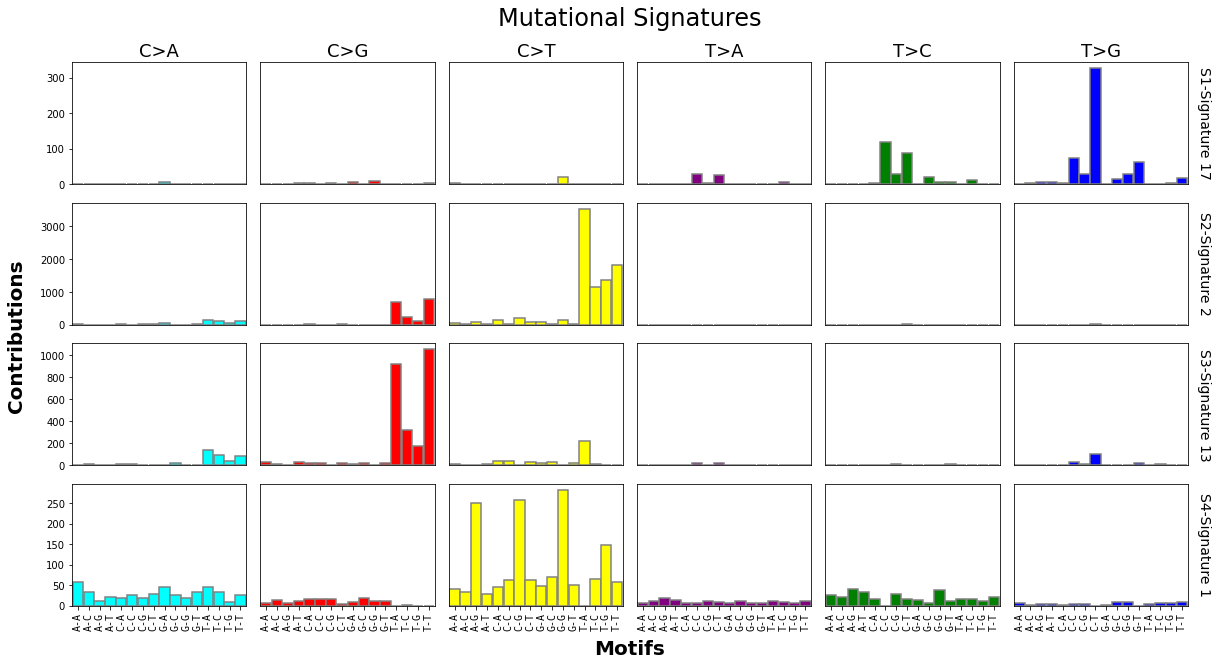

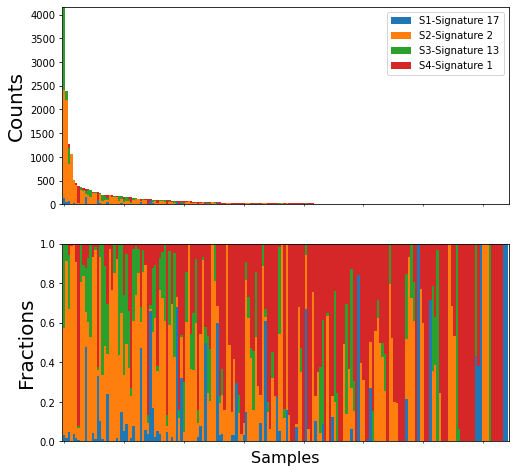

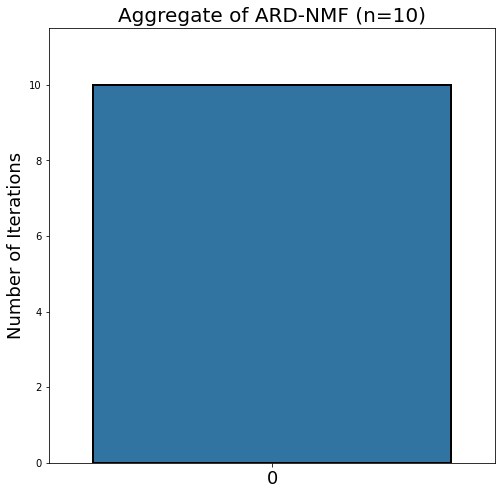

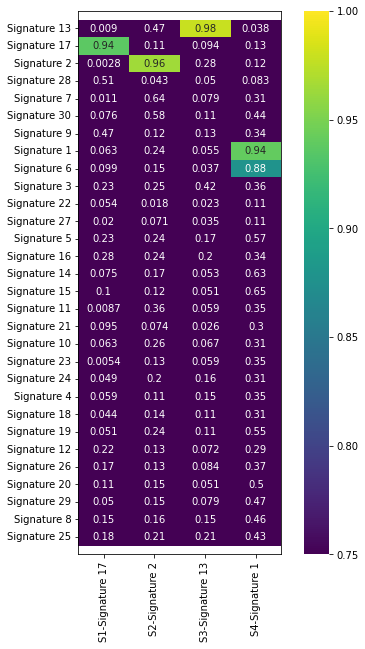

In [160]:
sa.run_maf(revised_input_by_clone, 
           outdir='/home/jupyter/test_signature_analyzer', 
           reference='cosmic2', 
           hg_build='/home/jupyter/hg19.2bit', 
           nruns=10)

In [161]:
sigs_weighted_maf = pd.read_csv('sigs_using_cosmic2/signature_weighted_maf.tsv',sep='\t')
sigs_weighted_maf.iloc[:, [21,26,27,28,29]]

,sample,S1-Signature 17,S2-Signature 2,S3-Signature 13,S4-Signature 1
0,1558_all_1,5.129884e-13,6.843270e-01,0.000000e+00,3.156730e-01
1,1558_all_1,0.000000e+00,9.723026e-01,4.129139e-26,2.769744e-02
2,1558_all_1,0.000000e+00,1.000000e+00,1.986946e-27,0.000000e+00
3,1558_all_1,5.129884e-13,6.843270e-01,0.000000e+00,3.156730e-01
4,1558_all_1,0.000000e+00,9.723026e-01,4.129139e-26,2.769744e-02
...,...,...,...,...,...
19899,MGH2974_9,1.000000e+00,4.373595e-31,0.000000e+00,4.914357e-30
19900,MGH2974_9,0.000000e+00,1.200376e-01,1.255448e-02,8.674079e-01
19901,MGH2974_9,0.000000e+00,5.274892e-02,1.667494e-02,9.305762e-01
19902,MGH2974_9,3.979863e-13,5.108547e-01,0.000000e+00,4.891453e-01


In [162]:
supervised_clones_and_sigs_tree = sigs_weighted_maf.iloc[:, [21,26,27,28,29]]

supervised_clones_and_sigs_tree.set_index('sample',inplace=True)


supervised_clones_unique_tree=list(onyl_tree_clones_supervised_weighted_maf['sample'].unique())

## collapse and average signatures per mutation by clone code

supervised_collapsed_sigs_list = []
supervised_collapsed_sigs_dict={}

for sample in supervised_clones_unique_tree:

    avg_sig = supervised_clones_and_sigs_tree.loc[sample].mean(axis=0)
    supervised_collapsed_sigs_list.append(avg_sig)
    supervised_collapsed_sigs_dict[sample] = avg_sig
    
supervised_new_collapsed_df_tree = pd.DataFrame.from_dict(supervised_collapsed_sigs_dict)


supervised_transpose_tree = supervised_new_collapsed_df_tree.T
supervised_transpose_tree.to_csv("autopsy_with_cosmic2_sigs_08212023.tsv", sep='\t')

## KMT2C mutations

In [2]:
mutations_with_sigs = pd.read_csv('sigs_using_cosmic2/signature_weighted_maf.tsv',sep='\t')
mutations_with_sigs

,Patient_ID,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Protein_change,Variant_Classification,...,Tumor_Sample_Barcode,sample,End_position,ref_context,context96.num,context96.word,S1-Signature 17,S2-Signature 2,S3-Signature 13,S4-Signature 1
0,1558,C1orf222,1,1916854,C,T,79,42,NaN,IGR,...,1558_all_1,1558_all_1,1916854,tcg,95,CTTG,5.129884e-13,6.843270e-01,0.000000e+00,3.156730e-01
1,1558,LRRC8B,1,90048674,C,G,149,103,p.I155M,Missense_Mutation,...,1558_all_1,1558_all_1,90048674,tcc,78,CGTC,0.000000e+00,9.723026e-01,4.129139e-26,2.769744e-02
2,1558,LRRC8B,1,90048739,C,T,132,99,p.S177L,Missense_Mutation,...,1558_all_1,1558_all_1,90048739,tca,93,CTTA,0.000000e+00,1.000000e+00,1.986946e-27,0.000000e+00
3,1558,DUSP10,1,221912318,C,T,103,59,p.E257K,Missense_Mutation,...,1558_all_1,1558_all_1,221912318,tcg,95,CTTG,5.129884e-13,6.843270e-01,0.000000e+00,3.156730e-01
4,1558,LHCGR,2,48915948,C,G,118,40,p.D330H,Missense_Mutation,...,1558_all_1,1558_all_1,48915948,tcc,78,CGTC,0.000000e+00,9.723026e-01,4.129139e-26,2.769744e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19899,2974,TRAPPC10,21,45507592,A,G,237,0,p.E851G,Missense_Mutation,...,MGH2974_9,MGH2974_9,45507592,gag,27,AGGG,1.000000e+00,4.373595e-31,0.000000e+00,4.914357e-30
19900,2974,TMEM211,22,25334260,G,A,171,5,NaN,Intron,...,MGH2974_9,MGH2974_9,25334260,agg,88,CTCT,0.000000e+00,1.200376e-01,1.255448e-02,8.674079e-01
19901,2974,APOL1,22,36661900,C,T,146,0,p.P340S,Missense_Mutation,...,MGH2974_9,MGH2974_9,36661900,ccc,86,CTCC,0.000000e+00,5.274892e-02,1.667494e-02,9.305762e-01
19902,2974,CACNA1I,22,40058067,C,T,308,1,p.S1000L,Missense_Mutation,...,MGH2974_9,MGH2974_9,40058067,tcg,95,CTTG,3.979863e-13,5.108547e-01,0.000000e+00,4.891453e-01


In [3]:
mutations_with_sigs[mutations_with_sigs['Hugo_Symbol'] == 'KMT2C']

,Patient_ID,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Protein_change,Variant_Classification,...,Tumor_Sample_Barcode,sample,End_position,ref_context,context96.num,context96.word,S1-Signature 17,S2-Signature 2,S3-Signature 13,S4-Signature 1
24,1558,KMT2C,7,151879322,G,A,79,33,p.Q1875*,Nonsense_Mutation,...,1558_all_1,1558_all_1,151879322,tga,93,CTTA,0.000000e+00,1.000000,1.986946e-27,0.000000
135,1558,KMT2C,7,152012253,G,C,92,0,p.S187*,Nonsense_Mutation,...,1558_all_11,1558_all_11,152012253,tga,77,CGTA,0.000000e+00,0.431350,5.686501e-01,0.000000
636,2389,KMT2C,7,151878626,C,A,119,0,p.E2107*,Nonsense_Mutation,...,2389_multiple_6_12,2389_multiple_6_12,151878626,tca,61,CATA,9.071548e-23,0.360755,6.192902e-01,0.019955
1795,2389,KMT2C,7,152007146,G,A,151,0,p.H252Y,Missense_Mutation,...,2389_multiple_6_17,2389_multiple_6_17,152007146,tga,93,CTTA,0.000000e+00,0.985298,1.470210e-02,0.000000
2456,2389,KMT2C,7,151859429,C,A,130,0,p.E3745*,Nonsense_Mutation,...,2389_multiple_6_18,2389_multiple_6_18,151859429,tct,64,CATT,0.000000e+00,0.512824,4.443666e-01,0.042810
2457,2389,KMT2C,7,151874215,C,A,163,0,p.E2775*,Nonsense_Mutation,...,2389_multiple_6_18,2389_multiple_6_18,151874215,tca,61,CATA,6.157068e-23,0.453745,4.944894e-01,0.051766
2458,2389,KMT2C,7,151878044,G,A,217,0,p.Q2301*,Nonsense_Mutation,...,2389_multiple_6_18,2389_multiple_6_18,151878044,tga,93,CTTA,0.000000e+00,0.925908,7.409180e-02,0.000000
2459,2389,KMT2C,7,151880082,C,A,89,0,p.E1748*,Nonsense_Mutation,...,2389_multiple_6_18,2389_multiple_6_18,151880082,tca,61,CATA,6.157068e-23,0.453745,4.944894e-01,0.051766
2460,2389,KMT2C,7,151917668,G,C,218,0,p.Q1218E,Missense_Mutation,...,2389_multiple_6_18,2389_multiple_6_18,151917668,tga,77,CGTA,0.000000e+00,0.364805,6.351946e-01,0.000000
3329,2389,KMT2C,7,151851222,G,C,129,0,p.S4050*,Nonsense_Mutation,...,2389_multiple_6_4,2389_multiple_6_4,151851222,tga,77,CGTA,0.000000e+00,1.000000,3.827146e-16,0.000000
